## study_styletransfer.ipynb

In [6]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached google_auth_oau

You should consider upgrading via the 'c:\20210710\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
network = tf.keras.applications.VGG19(include_top = False, weights = "imagenet")

In [ ]:
network.summary()

In [ ]:
len(network.layers)

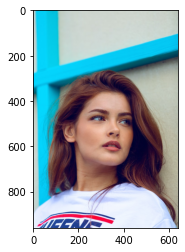

In [13]:
content_image = tf.keras.preprocessing.image.load_img("g2.jpg")
plt.imshow(content_image)

In [14]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [15]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [16]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (960, 640, 3), 0.0, 255.0)

In [17]:
content_image = content_image / 255

In [18]:
content_image.min(), content_image.max()

(0.0, 1.0)

In [19]:
content_image

array([[[0.7647059 , 0.8039216 , 0.77254903],
        [0.7607843 , 0.8       , 0.76862746],
        [0.76862746, 0.79607844, 0.7647059 ],
        ...,
        [0.7294118 , 0.76862746, 0.7254902 ],
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.72156864, 0.7607843 , 0.7176471 ]],

       [[0.7647059 , 0.8039216 , 0.77254903],
        [0.7607843 , 0.8       , 0.76862746],
        [0.76862746, 0.79607844, 0.7647059 ],
        ...,
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.7254902 , 0.7647059 , 0.72156864]],

       [[0.7647059 , 0.8039216 , 0.77254903],
        [0.7607843 , 0.8       , 0.76862746],
        [0.7607843 , 0.8       , 0.7647059 ],
        ...,
        [0.72156864, 0.7607843 , 0.7176471 ],
        [0.7254902 , 0.7647059 , 0.72156864],
        [0.7254902 , 0.7647059 , 0.72156864]],

       ...,

       [[0.91764706, 0.9490196 , 1.        ],
        [0.91764706, 0.9490196 , 1.        ],
        [0.91764706, 0

In [20]:
content_image = content_image[tf.newaxis, :]

In [21]:
content_image.shape

(1, 960, 640, 3)